In [51]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df_train  = pd.read_csv("data/TRAIN_SET.csv")

In [54]:
df_test = pd.read_csv("data/TEST_SET.csv")


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [56]:
kfold = KFold(5, shuffle = True, random_state = 123)

### Model 6 - XGBoost Regressor using  BEDS, BATHS, SQUARE FEET, LOT SIZE, AGE, LATITUDE, LATITUDE, Bayes_RatingSchool, crime_percentage, Age, zipcode, Property type (5 classes) with best parameters

In [57]:
# define model object 
model6 = xgb.XGBRegressor(learning_rate=0.1,
                           max_depth=5,
                           min_child_weight=2,
                           n_estimators=150,
                           subsample=0.6)

rmse = np.zeros((5,1))

for i, (train_index, test_index) in enumerate(kfold.split(df_train)):
    # get the cross validation train set and holdout set 
    df_tt = df_train.iloc[train_index]
    df_ho = df_train.iloc[test_index]

    #fit the model1 
    model6.fit(df_tt[['BEDS','BATHS', 'SQUARE FEET', 'LOT SIZE',  'zipcode', 'LATITUDE', 'LONGITUDE',
                      'Bayes_RatingSchool','crime_percentage', 'Age', 'Single Family', 'Townhouse', 'Condo', 'Multi_Family4', 'Multi_Family5']],
               df_tt.log_price.values)
    
    # predict values for holdout set 
    pred6 = model6.predict(df_ho[['BEDS','BATHS', 'SQUARE FEET', 'LOT SIZE',  'zipcode', 'LATITUDE', 'LONGITUDE',
                      'Bayes_RatingSchool','crime_percentage', 'Age', 'Single Family', 'Townhouse', 'Condo', 'Multi_Family4', 'Multi_Family5']])
    
    # record mse
    rmse[i] = np.sqrt(mean_squared_error(df_ho[['log_price']], pred6))
    i = i + 1

print('mean rmse for XGBoost model including non traditional features on the training set is', rmse.mean())

mean rmse for XGBoost model including non traditional features on the training set is 0.09547820019113182


In [58]:
pred_test = model6.predict(df_test[['BEDS','BATHS', 'SQUARE FEET', 'LOT SIZE',  'zipcode', 'LATITUDE', 'LONGITUDE',
                      'Bayes_RatingSchool','crime_percentage', 'Age', 'Single Family', 'Townhouse', 'Condo', 'Multi_Family4', 'Multi_Family5']])
rmse_test = np.sqrt(mean_squared_error(df_test[['log_price']], pred_test))
print('mean rmse for XGBoost model including non traditional features on the testing set is', rmse_test)

mean rmse for XGBoost model including non traditional features on the testing set is 0.10037622233966173


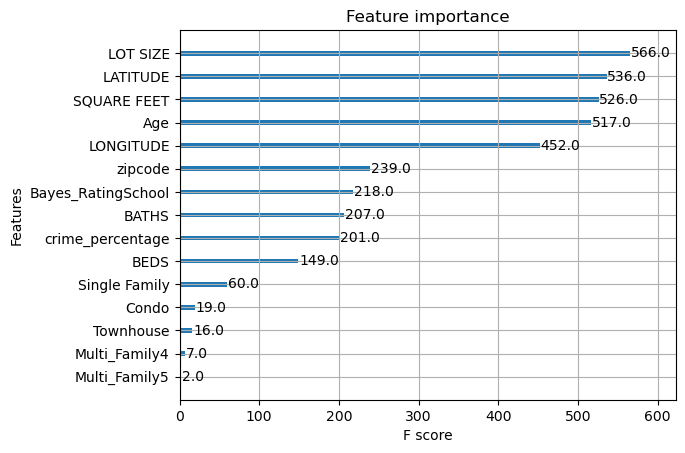

In [59]:
xgb.plot_importance(model6, importance_type = 'weight')#, ax=plt.gca())
plt.show()

In [60]:
# compute R^2 on the testing set
from sklearn.metrics import r2_score
r2 = r2_score(df_test.log_price.values, pred_test)
r2

0.8712723989097053

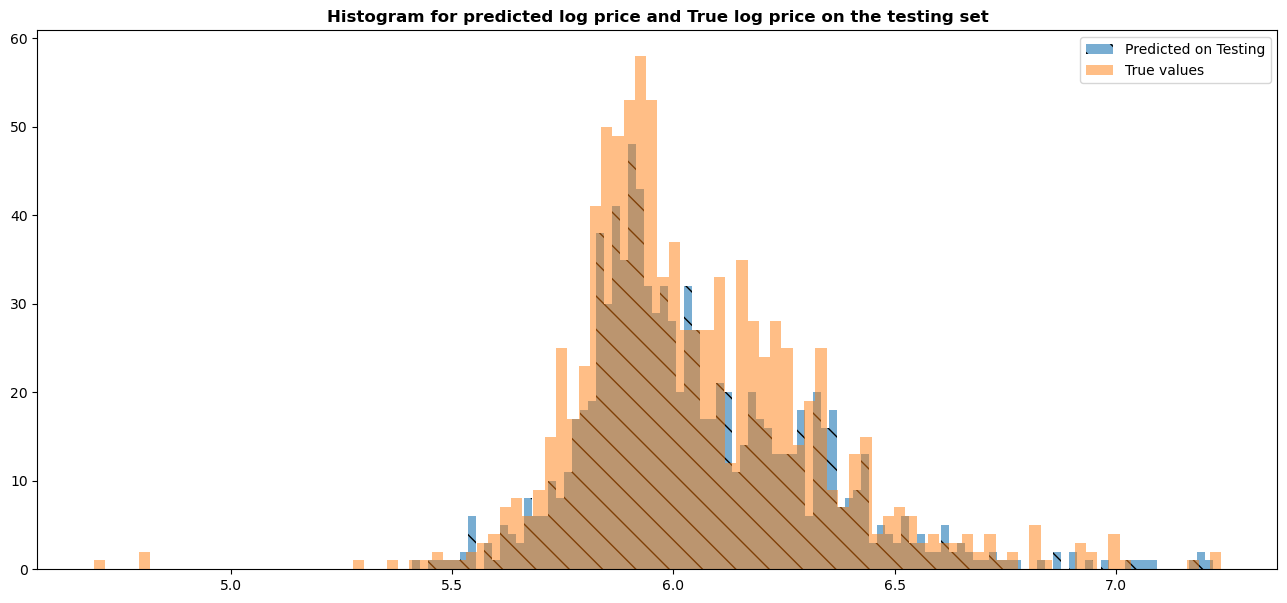

In [61]:
plt.figure(figsize=(16,7))

# Plot the histograms with proper labels
plt.hist(pred_test, label='Predicted on Testing', bins=100, hatch='\\', alpha=0.6)
plt.hist(df_test.log_price.values, label='True values', bins=100, alpha=0.5)

# Add title
plt.title('Histogram for predicted log price and True log price on the testing set', fontweight="bold")

# Add legend
plt.legend(loc='upper right')

# Show plot
plt.show()


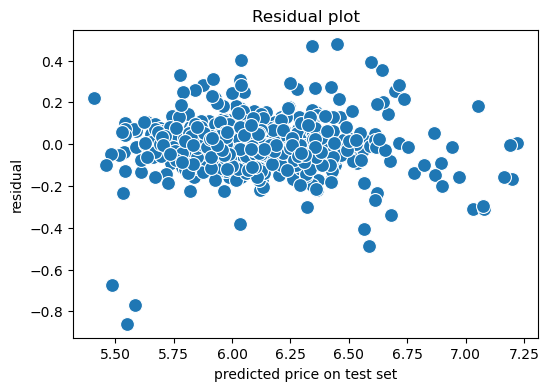

In [62]:
residuals = df_test.log_price.values - pred_test
plt.figure(figsize=(6,4))
sns.scatterplot(data=None, x=pred_test, y=residuals, s=100, legend='auto')

plt.xlabel('predicted price on test set')
plt.ylabel('residual')
plt.title('Residual plot')
plt.show()

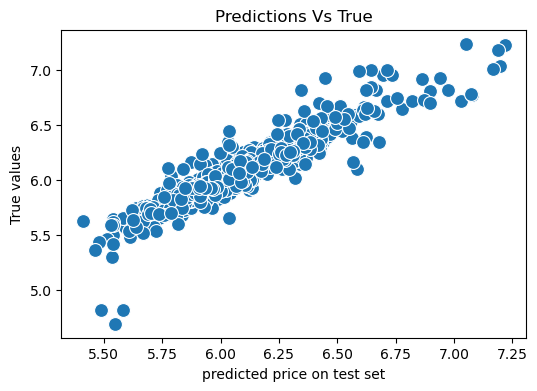

In [63]:

plt.figure(figsize=(6,4))
sns.scatterplot(data=None, x=pred_test, y=df_test.log_price.values, s=100, legend='auto')

plt.xlabel('predicted price on test set')
plt.ylabel('True values')
plt.title('Predictions Vs True')
plt.show()

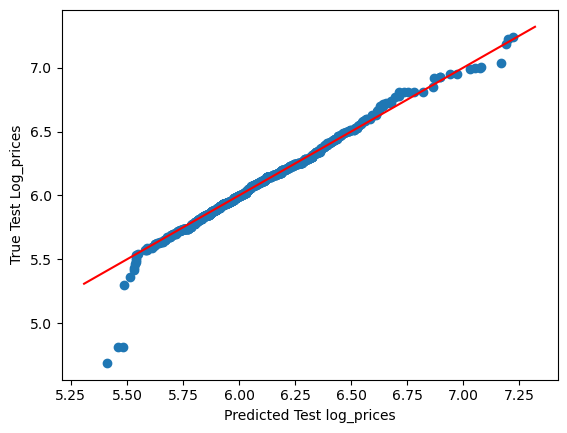

In [64]:
X = np.sort(pred_test)
Y = df_test['log_price'].sort_values()
plt.scatter(X,Y)
plt.ylabel("True Test Log_prices")
plt.xlabel("Predicted Test log_prices")
plt.plot(np.linspace(np.min(X)-.1,np.max(X)+0.1),np.linspace(np.min(X)-.1,np.max(X)+0.1),'r')